In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import xlrd
from xlwt import Workbook, Formula
import pandas
from time import sleep
import serial

In [37]:
ser = serial.Serial('/dev/cu.usbmodem14201', 2000000) # Establish the connection on a specific port
counter = 32 # Below 32 everything in ASCII is gibberish
Times = []
PosX = []
PosY = []
PosZ = []
while True:
    intro = ser.readline()
    if intro[0:-2].decode("utf-8") == 'GO':
        a = ser.readline()
        Times.append(a[0:-2].decode("utf-8"))
        b = ser.readline()
        PosX.append(b[0:-2].decode("utf-8"))
        c = ser.readline()
        PosY.append(c[0:-2].decode("utf-8"))
        d = ser.readline()
        PosZ.append(d[0:-2].decode("utf-8"))
        
 # Convert the decimal number to ASCII then send it to the Arduino# Read the newest output from the Arduino
    sleep(.01) # Delay for one tenth of a second


KeyboardInterrupt: 

In [38]:
for i in range(len(Times)):
    Times[i] = int(Times[i])
    PosX[i] = -int(PosX[i])
    PosY[i] = int(PosY[i])
    
data = pd.DataFrame([Times,PosX,PosY,PosZ])
data=data.T
data.columns = ['Time','PosX','PosY','PosZ']

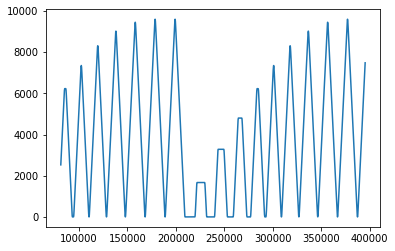

In [40]:
plt.plot(Times, PosY)

In [12]:
print(Times)

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2601, 2701, 2802, 2902, 3003, 3103, 3204, 3304, 3405, 3505, 3606, 3706, 3807, 3907, 4007, 4107, 4207, 4307, 4407, 4507, 4608, 4708, 4809, 4909, 5010, 5110, 5211, 5311, 5412, 5512, 5613, 5713, 5814, 5914, 6016, 6116, 6217, 6317, 6418, 6518, 6619, 6719, 6820, 6920, 7021, 7121, 7222, 7322, 7424, 7524, 7625, 7725, 7826, 7926, 8027, 8127, 8228, 8328, 8429, 8529, 8629, 8729, 8830, 8930, 9030, 9131, 9231, 9331, 9431, 9531, 9631, 9731, 9831, 9931, 10031, 10132, 10233, 10333, 10433, 10533, 10633, 10734, 10834, 10935, 11035, 11136, 11237, 11337, 11437, 11538, 11638, 11738, 11838, 11938, 12038, 12138, 12238, 12338, 12438, 12538, 12638, 12739, 12839, 12940, 13040, 13142, 13242, 13343, 13443, 13544, 13644, 13745, 13845, 13946, 14046, 14147, 14247, 14348, 14448, 14548, 14648, 14749, 14849, 14950, 15050, 15151, 15251, 15352, 15452, 15553, 15653, 15754, 15854

In [41]:
data.to_excel("15.12_NOEQUIV_X12800.xlsx") #DATE DU JOUR À METTRE 

In [42]:
ser.close()